In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (25000,)
Testing Data Shape: (25000,)


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 200

X_train_padded = pad_sequences(X_train, maxlen=maxlen)
X_test_padded = pad_sequences(X_test, maxlen=maxlen)

In [14]:
model = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:

history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6990 - loss: 0.5312 - val_accuracy: 0.8604 - val_loss: 0.3194
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9569 - loss: 0.1255 - val_accuracy: 0.8404 - val_loss: 0.4136
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9944 - loss: 0.0234 - val_accuracy: 0.8420 - val_loss: 0.5488
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9999 - loss: 0.0032 - val_accuracy: 0.8294 - val_loss: 0.6915
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.8328 - val_loss: 0.7138
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 1.0000 - loss: 2.7520e-04 - val_accuracy: 0.8368 - val_loss: 0.7445
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 1.0000 - loss: 1.3101e-04 - val_accuracy: 0.8402 - val_loss: 0.7491
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 1.0000 - loss: 7.1187e

In [16]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=2)

print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


782/782 - 3s - 4ms/step - accuracy: 0.8400 - loss: 0.8020
Test Loss: 0.80
Test Accuracy: 0.84


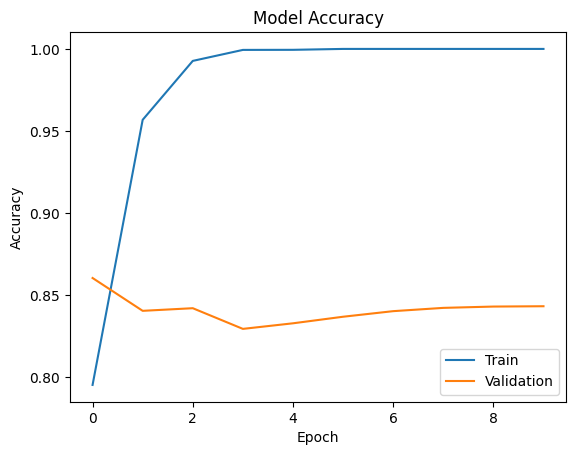

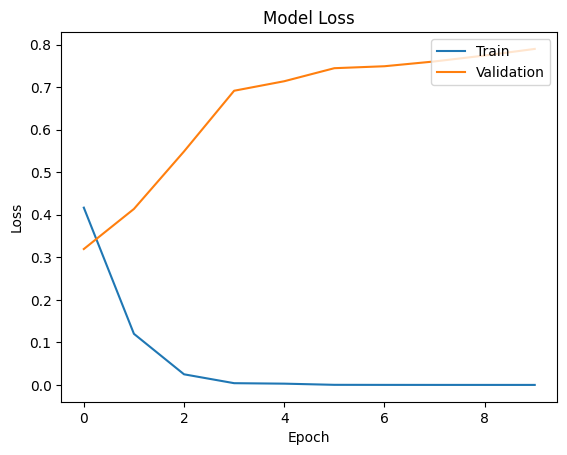

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
predictions = model.predict(X_test_padded[:5])

for i, pred in enumerate(predictions):
    print(f"Review {i+1}: Predicted Sentiment: {'Positive' if pred[0] > 0.5 else 'Negative'} | Actual Sentiment: {'Positive' if y_test[i]==1 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Review 1: Predicted Sentiment: Negative | Actual Sentiment: Negative
Review 2: Predicted Sentiment: Positive | Actual Sentiment: Positive
Review 3: Predicted Sentiment: Positive | Actual Sentiment: Positive
Review 4: Predicted Sentiment: Negative | Actual Sentiment: Negative
Review 5: Predicted Sentiment: Positive | Actual Sentiment: Positive
